In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')

def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [6]:
mha_tag = tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False)['id'].values[3]

In [9]:
mha_works = works.loc[works['tags'].astype('string').str.contains(str(mha_tag))]

In [10]:
mha_works['year'] = mha_works['creation date'].str[:4]
mha_works['month'] = mha_works['creation date'].str[5:7]
mha_works['sm_date'] = mha_works['creation date'].str[0:7]
mha_works

C:\Users\isiyb\AppData\Local\Temp\ipykernel_25092\3758674873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mha_works['year'] = mha_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_25092\3758674873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mha_works['month'] = mha_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_25092\3758674873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
48,2021-02-26,en,False,True,1642.0,11+3828398+9927430+3741113+5747754+26481509+51...,NaN,2021,02,2021-02
76,2021-02-26,en,False,True,1224.0,12+3828398+4918711+3741110+3958226+634+27859+2...,NaN,2021,02,2021-02
78,2021-02-26,en,False,False,181.0,11+3828398+6817513+6817525+6817516+6817519+150...,NaN,2021,02,2021-02
99,2021-02-26,en,False,False,10197.0,11+3828398+244259+19652187+32611120+3741113+18...,NaN,2021,02,2021-02
100,2021-02-26,en,False,True,5788.0,10+3828398+4918711+261834+7002+110+30408248+10...,NaN,2021,02,2021-02
...,...,...,...,...,...,...,...,...,...,...
5914258,2015-02-11,en,False,True,3101.0,11+23+14+16+3828398+4188197+3741113+3741110+32...,NaN,2015,02,2015-02
5933537,2015-01-28,en,False,True,430.0,10+21+16+3828398+4132652+4132655,NaN,2015,01,2015-01
5957625,2015-01-09,en,False,False,1497.0,10+21+16+3828398+3925928+3925937+3985037+39850...,NaN,2015,01,2015-01
5962200,2015-01-06,en,False,False,57748.0,21+23+16+3828398+3741113+3741110+3958226+39582...,NaN,2015,01,2015-01


In [17]:
mha_sm_dates = mha_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

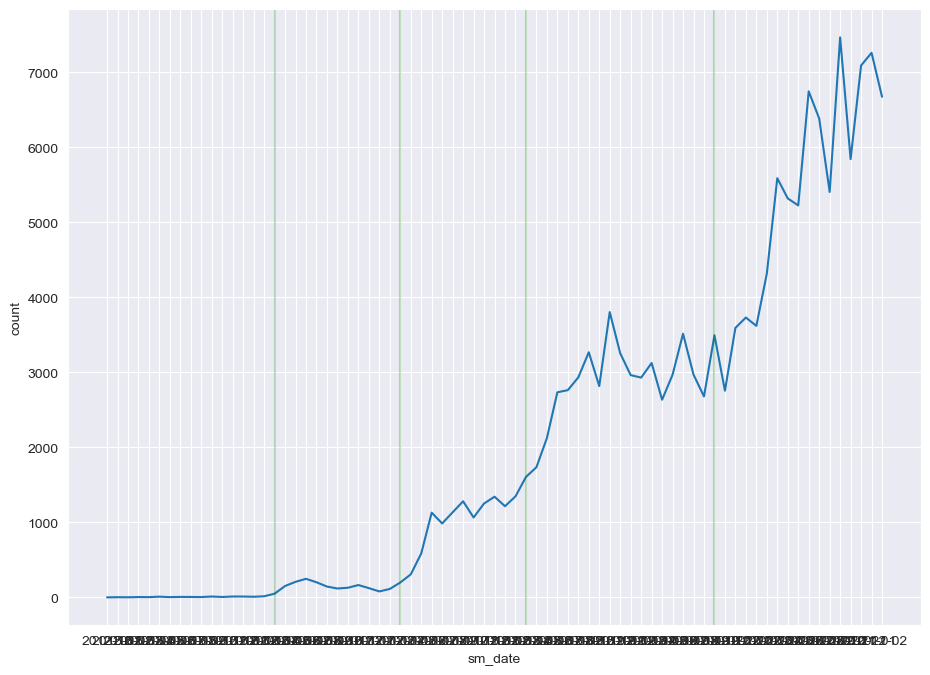

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=mha_sm_dates, x=mha_sm_dates['sm_date'], y=mha_sm_dates['count'])
plt.axvline(x='2016-04', color='green', alpha=0.25)
plt.axvline(x='2017-04', color='green', alpha=0.25)
plt.axvline(x='2018-04', color='green', alpha=0.25)
plt.axvline(x='2019-10', color='green', alpha=0.25)
plt.show()

In [25]:
tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False).head(20)

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
168289,258526,Fandom,Teen Wolf (TV),True,172802,NaN
679946,1001939,Fandom,The Avengers (Marvel Movies),True,157813,NaN
92059,133185,Fandom,Sherlock (TV),True,151925,NaN
5974,7266,Fandom,Marvel,True,147757,NaN
494603,758208,Fandom,Haikyuu!!,True,130918,NaN


Anime typically has more episodes being released over a period of time compared to live action shows or individual movies, so it can take longer to 'peak' after new media drops. Maybe worthwhile to compare season release lengths.